In [3]:
%pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 17.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 6.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




In [12]:
df = pd.read_csv('./ChurnDataset.csv')

In [7]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Deal with missing values
def check_missing_values(df):
    # Check for missing values in each column
    missing_values = df.isnull().sum()

    # Print the count of missing values for each column
    print("Missing Values:\n", missing_values)

    # Calculate the percentage of missing values for each column
    total_entries = len(df)
    percentage_missing = (missing_values / total_entries) * 100

    # Print the percentage of missing values for each column
    print("\nPercentage of Missing Values:\n", percentage_missing)

check_missing_values(df)
print("There are no missing values")

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Percentage of Missing Values:
 RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64
There are no missing values


In [15]:
# encode the categorical variables

# Define the columns to be encoded
categorical_columns = ['Geography', 'Gender']

# Create a ColumnTransformer to apply the OneHotEncoder to the categorical columns
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Apply the ColumnTransformer to the DataFrame
encoded_df = ct.fit_transform(df)

# Convert the encoded DataFrame back to a pandas DataFrame
encoded_df = pd.DataFrame(encoded_df)

# Print the encoded DataFrame
print(encoded_df)


       0    1    2    3    4      5         6          7    8   9   10  \
0     1.0  0.0  0.0  1.0  0.0      1  15634602   Hargrave  619  42   2   
1     0.0  0.0  1.0  1.0  0.0      2  15647311       Hill  608  41   1   
2     1.0  0.0  0.0  1.0  0.0      3  15619304       Onio  502  42   8   
3     1.0  0.0  0.0  1.0  0.0      4  15701354       Boni  699  39   1   
4     0.0  0.0  1.0  1.0  0.0      5  15737888   Mitchell  850  43   2   
...   ...  ...  ...  ...  ...    ...       ...        ...  ...  ..  ..   
9995  1.0  0.0  0.0  0.0  1.0   9996  15606229   Obijiaku  771  39   5   
9996  1.0  0.0  0.0  0.0  1.0   9997  15569892  Johnstone  516  35  10   
9997  1.0  0.0  0.0  1.0  0.0   9998  15584532        Liu  709  36   7   
9998  0.0  1.0  0.0  0.0  1.0   9999  15682355  Sabbatini  772  42   3   
9999  1.0  0.0  0.0  1.0  0.0  10000  15628319     Walker  792  28   4   

             11 12 13 14         15 16  
0           0.0  1  1  1  101348.88  1  
1      83807.86  1  0  1  112

In [17]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

In [ ]:
# Set the independent variables
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# Set the dependent variable
y = df['Exited']


In [19]:
from sklearn.model_selection import train_test_split

# Set the independent variables
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# Set the dependent variable
y = df['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.803


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.803


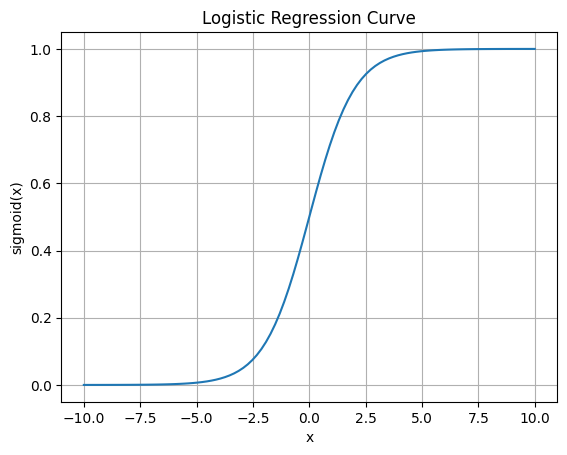

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid curve
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Logistic Regression Curve')
plt.grid(True)
plt.show()
